Проверка гипотез

In [13]:
import pandas as pd
import numpy as np
from scipy import stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import spearmanr

In [6]:
data = pd.read_csv('data_cleaned.csv')

# **Зависимость счастья от доверия к власти**


- H0: Уровень доверия к власти не влияет на уровень счастья человека
- H1: Уровень доверия к власти оказывает влияние на уровень счастья

Проверку буду осуществлять при помощи корреляции Спирмена

In [15]:
# Описательные статистики

stats = data.groupby('trstlgl')['happy'].agg(['mean', 'std', 'count']).reset_index()
print("\nОписательные статистики по группам:")
print(stats.round(2))


Описательные статистики по группам:
    trstlgl  mean   std  count
0       0.0  7.25  2.18    503
1       1.0  6.94  2.16    271
2       2.0  7.29  1.98    531
3       3.0  7.22  1.79    824
4       4.0  7.40  1.67    903
5       5.0  7.64  1.65   1570
6       6.0  7.66  1.47   1383
7       7.0  7.82  1.36   2067
8       8.0  8.01  1.32   2334
9       9.0  8.30  1.30   1308
10     10.0  8.54  1.52    548


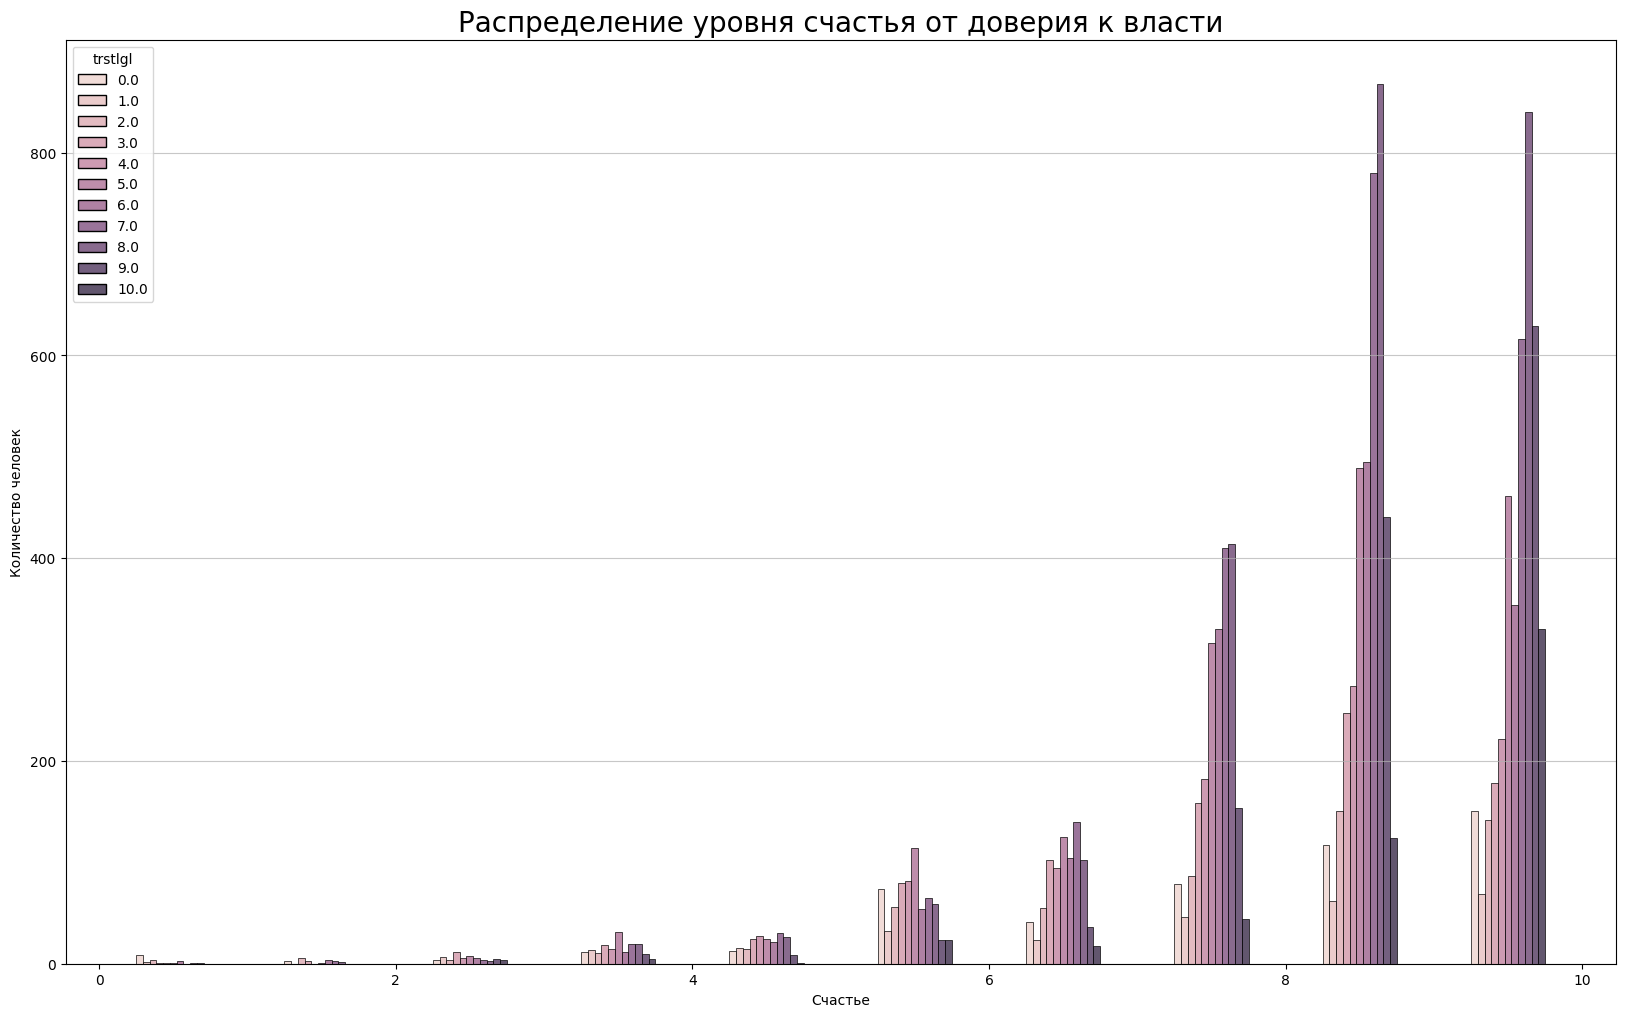

In [14]:
# Распределение по разным категориям
plt.figure(figsize=(20, 12))
sns.histplot(data=data, x='happy', bins=10, hue='trstlgl', multiple="dodge",shrink=.5)

plt.title("Распределение уровня счастья от доверия к власти", fontsize=20)
plt.xlabel("Счастье")
plt.ylabel("Количество человек")
plt.grid(axis='y', alpha=0.7)
plt.show()

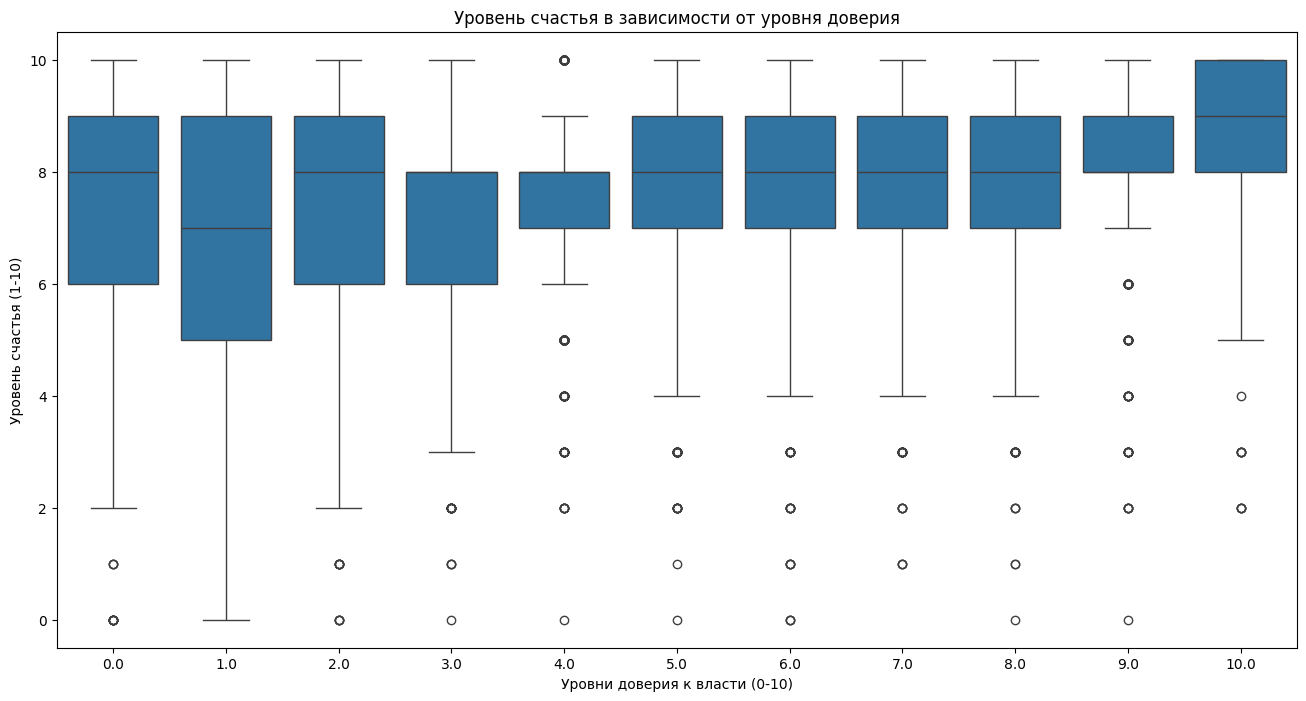

In [31]:
# Боксплот
plt.figure(figsize=(16, 8))
sns.boxplot(x='trstlgl', y='happy', data=data)
plt.title('Уровень счастья в зависимости от уровня доверия')
plt.xlabel('Уровни доверия к власти (0-10)')
plt.ylabel('Уровень счастья (1-10)')
plt.show()

In [26]:
# Расчет корреляции и её интерпретация

corr, p_value = spearmanr(data['trstlgl'], data['happy'])

print(f"Коэффициент корреляции Спирмена: {corr:.3f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Корреляция статистически значима (p < 0.05)")
else:
    print("Корреляция незначима (p >= 0.05)")

Коэффициент корреляции Спирмена: 0.221
P-значение: 0.0000
Корреляция статистически значима (p < 0.05)


Отвергаем нулевую гипотезу - Доверие к власти влияет на уровень счастья

# **Зависимость счастья от качества сна**


- H0: Качество сна на прошлой неделе не влияет на уровень счастья человека
- H1: Качество сна оказывает влияние на уровень счастья

Проверку буду осуществлять при помощи корреляции Спирмена



In [28]:
# Описательные статистики

stats = data.groupby('slprl')['happy'].agg(['mean', 'std', 'count']).reset_index()
print("\nОписательные статистики по группам:")
print(stats.round(2))


Описательные статистики по группам:
   slprl  mean   std  count
0    1.0  8.02  1.42   5250
1    2.0  7.76  1.48   4880
2    3.0  7.26  1.86   1413
3    4.0  6.85  2.27    699


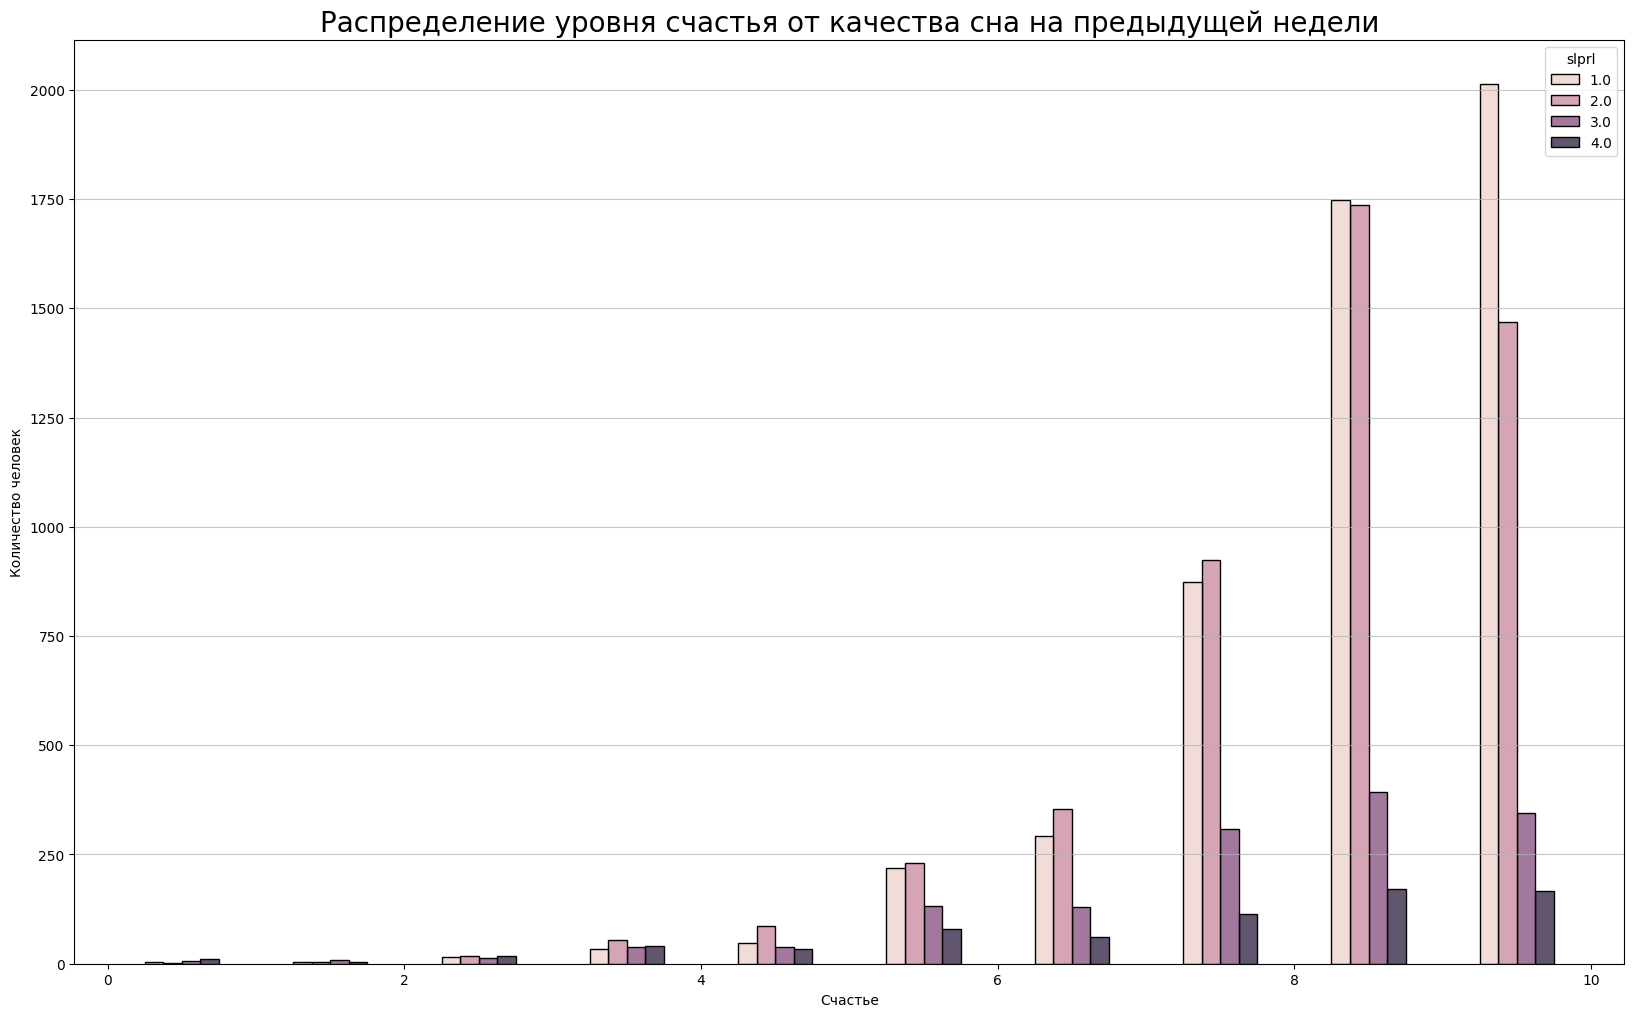

In [30]:
# Распределение по разным категориям
plt.figure(figsize=(20, 12))
sns.histplot(data=data, x='happy', bins=10, hue='slprl', multiple="dodge",shrink=.5)

plt.title("Распределение уровня счастья от качества сна на предыдущей недели", fontsize=20)
plt.xlabel("Счастье")
plt.ylabel("Количество человек")
plt.grid(axis='y', alpha=0.7)
plt.show()

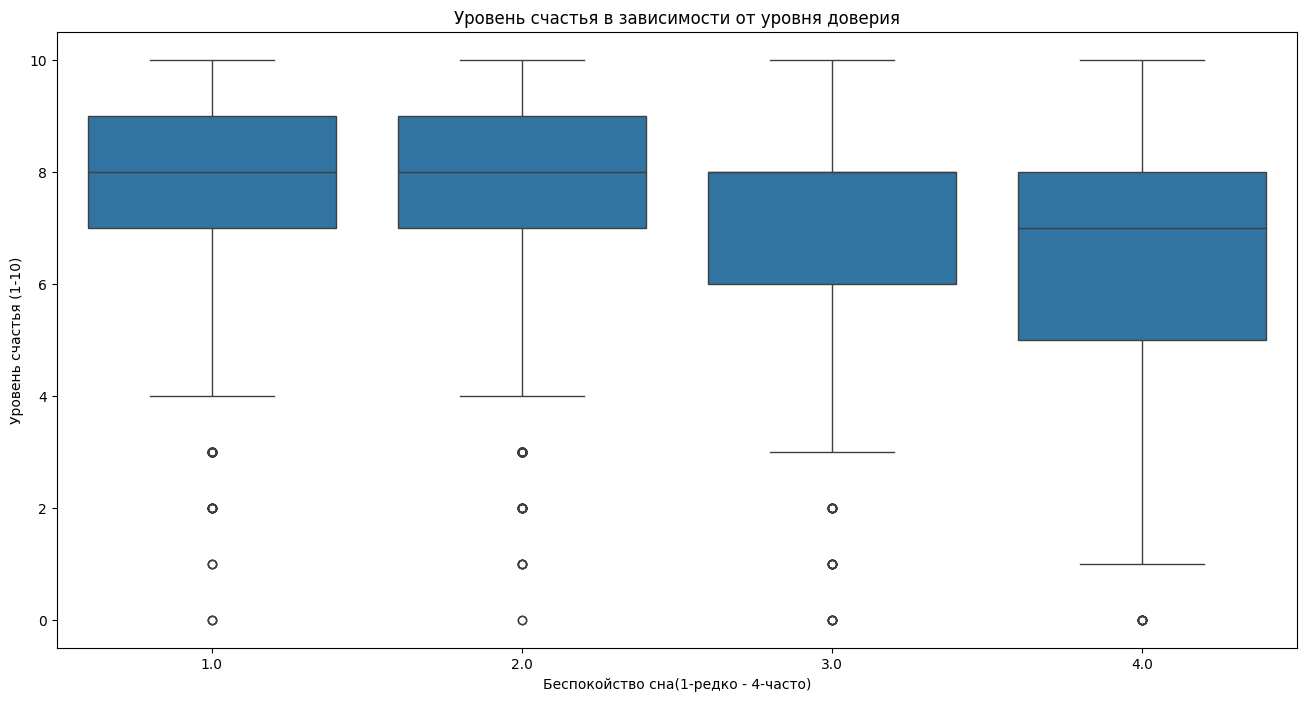

In [33]:
# Боксплот
plt.figure(figsize=(16, 8))
sns.boxplot(x='slprl', y='happy', data=data)
plt.title('Уровень счастья в зависимости от уровня доверия')
plt.xlabel('Беспокойство сна(1-редко - 4-часто)')
plt.ylabel('Уровень счастья (1-10)')
plt.show()

In [35]:
# Расчет корреляции и её интерпретация

corr, p_value = spearmanr(data['slprl'], data['happy'])

print(f"Коэффициент корреляции Спирмена: {corr:.3f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Корреляция статистически значима (p < 0.05)")
else:
    print("Корреляция незначима (p >= 0.05)")

Коэффициент корреляции Спирмена: -0.164
P-значение: 0.0000
Корреляция статистически значима (p < 0.05)


Отвергаем нулевую гипотезу - Беспокойный сон отрицательно влияет на уровень счастья


# **Зависимость счастья от важности быть признанным в обществе**

- H0: Необходимость признания человека обществом не влияет на его уровень счастья
- H1: Необходимость признания влияние на уровень счастья

Проверку буду осуществлять при помощи корреляции Спирмена

In [37]:
# Описательные статистики

stats = data.groupby('ipsucesa')['happy'].agg(['mean', 'std', 'count']).reset_index()
print("\nОписательные статистики по группам:")
print(stats.round(2))


Описательные статистики по группам:
   ipsucesa  mean   std  count
0       1.0  7.85  1.71    972
1       2.0  7.73  1.59   2638
2       3.0  7.77  1.52   3075
3       4.0  7.77  1.55   2428
4       5.0  7.73  1.64   2371
5       6.0  7.82  1.72    758


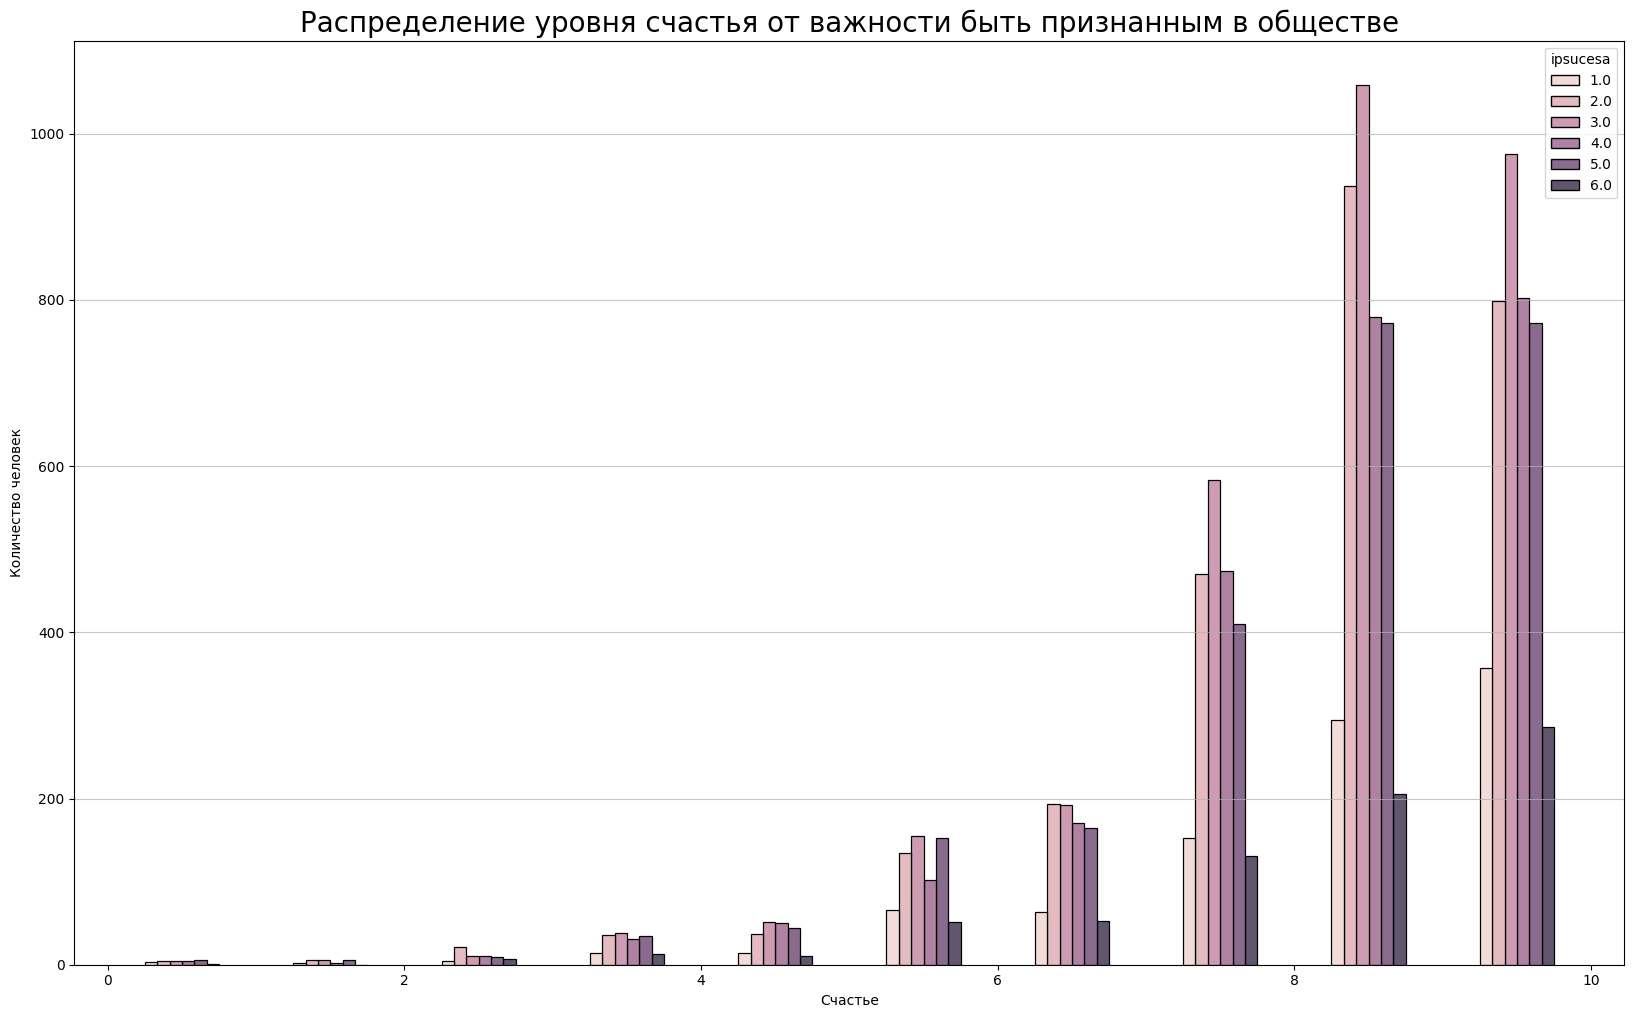

In [38]:
plt.figure(figsize=(20, 12))
sns.histplot(data=data, x='happy', bins=10, hue='ipsucesa', multiple="dodge",shrink=.5)

plt.title("Распределение уровня счастья от важности быть признанным в обществе", fontsize=20)
plt.xlabel("Счастье")
plt.ylabel("Количество человек")
plt.grid(axis='y', alpha=0.7)
plt.show()

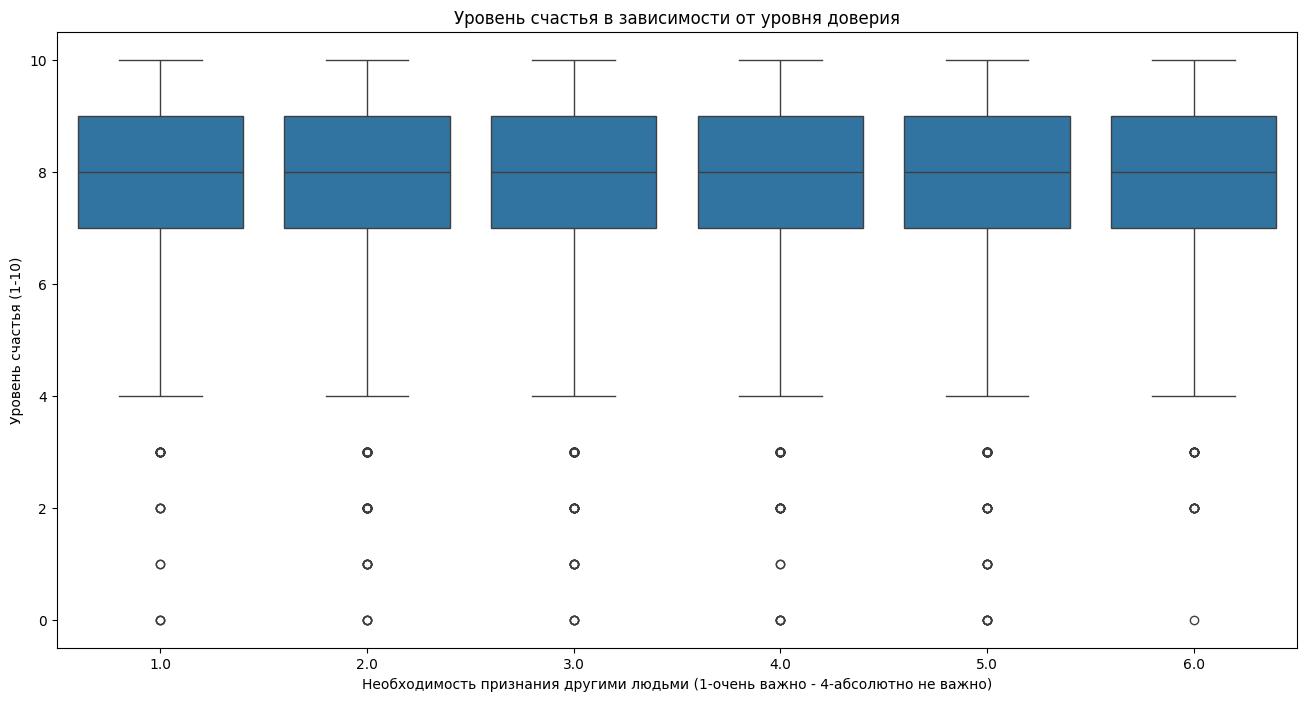

In [41]:
# Боксплот
plt.figure(figsize=(16, 8))
sns.boxplot(x='ipsucesa', y='happy', data=data)
plt.title('Уровень счастья в зависимости от уровня доверия')
plt.xlabel('Необходимость признания другими людьми (1-очень важно - 4-абсолютно не важно)')
plt.ylabel('Уровень счастья (1-10)')
plt.show()

In [42]:
# Расчет корреляции и её интерпретация

corr, p_value = spearmanr(data['ipsucesa'], data['happy'])

print(f"Коэффициент корреляции Спирмена: {corr:.3f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Корреляция статистически значима (p < 0.05)")
else:
    print("Корреляция незначима (p >= 0.05)")

Коэффициент корреляции Спирмена: 0.000
P-значение: 0.9999
Корреляция незначима (p >= 0.05)


Принимаем нулевую гипотезу - Важность признания не оказывает влияние на уровень счастья
